In [34]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 데이터 확인

In [2]:
df_features = pd.read_csv('./data/abnormal_features.csv')
df_targets = pd.read_csv('./data/abnormal_target.csv')

In [3]:
df_features.head()

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000004,0.0,0.0,0.0,0.0
2,0,0.000008,0.0,0.0,0.0,0.0
3,0,0.000012,0.0,0.0,0.0,0.0
4,0,0.000016,0.0,0.0,0.0,0.0


In [4]:
df_targets.head()

,id,X,Y,M,V
0,0,0.0,-400.0,50.0,0.4
1,1,400.0,0.0,100.0,1.0
2,2,-300.0,-200.0,25.0,0.4
3,3,200.0,-100.0,150.0,0.4
4,4,-300.0,-100.0,150.0,0.4


In [5]:
df_features.shape, df_targets.shape

((1050000, 6), (2800, 5))

In [11]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   id      1050000 non-null  int64  
 1   Time    1050000 non-null  float64
 2   S1      1050000 non-null  float64
 3   S2      1050000 non-null  float64
 4   S3      1050000 non-null  float64
 5   S4      1050000 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 48.1 MB


In [12]:
df_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      2800 non-null   int64  
 1   X       2800 non-null   float64
 2   Y       2800 non-null   float64
 3   M       2800 non-null   float64
 4   V       2800 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 109.5 KB


In [14]:
(df_features.isnull()).sum()

id      0
Time    0
S1      0
S2      0
S3      0
S4      0
dtype: int64

In [15]:
(df_targets.isnull()).sum()

id    0
X     0
Y     0
M     0
V     0
dtype: int64

# EDA & 전처리

- 데이터 병합

In [18]:
# id
len(df_features['id'].unique()), len(df_targets['id'].unique())

(2800, 2800)

In [20]:
# time별 / time 지날수록 컬럼들의 변화가 있나?
df_features[df_features['id'] == 0]

,id,Time,S1,S2,S3,S4
0,0,0.000000,0.00,0.00,0.00,0.000
1,0,0.000004,0.00,0.00,0.00,0.000
2,0,0.000008,0.00,0.00,0.00,0.000
3,0,0.000012,0.00,0.00,0.00,0.000
4,0,0.000016,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...
370,0,0.001480,-64168.90,-64168.90,52279.59,106792.600
371,0,0.001484,-64236.79,-64236.79,16518.64,58248.420
372,0,0.001488,-63755.95,-63755.95,-25270.30,3015.649
373,0,0.001492,-63020.44,-63020.44,-65904.66,-49795.140


In [29]:
# 평균값으로 merge 준비
df_features_proc = df_features.groupby('id', as_index=False).mean()
df_features_proc

,id,Time,S1,S2,S3,S4
0,0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893
1,1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221
2,2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340
3,3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867
4,4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287
...,...,...,...,...,...,...
2795,2795,0.000748,5600.614397,5885.824925,-6380.192826,-7357.437798
2796,2796,0.000748,-1215.328099,2702.879683,805.983784,-2876.150150
2797,2797,0.000748,436.239993,276.327514,951.805606,-903.193922
2798,2798,0.000748,-2394.515047,6230.349355,-8365.334186,-6421.442031


In [30]:
df_merge = pd.merge(df_features_proc, df_targets, on='id', how='left')
df_merge

,id,Time,S1,S2,S3,S4,X,Y,M,V
0,0,0.000748,-308.304553,-308.304553,1119.504719,1410.502893,0.0,-400.0,50.0,0.4
1,1,0.000748,12780.176893,981.778780,7953.031214,-15584.755221,400.0,0.0,100.0,1.0
2,2,0.000748,-674.289628,-1575.681938,137.430228,-407.092340,-300.0,-200.0,25.0,0.4
3,3,0.000748,2164.216981,-11274.728589,-4221.738240,5241.350867,200.0,-100.0,150.0,0.4
4,4,0.000748,-980.480585,-6966.912566,-2555.746810,5596.931287,-300.0,-100.0,150.0,0.4
...,...,...,...,...,...,...,...,...,...,...
2795,2795,0.000748,5600.614397,5885.824925,-6380.192826,-7357.437798,200.0,200.0,50.0,1.0
2796,2796,0.000748,-1215.328099,2702.879683,805.983784,-2876.150150,-400.0,-400.0,150.0,0.2
2797,2797,0.000748,436.239993,276.327514,951.805606,-903.193922,-100.0,0.0,50.0,0.2
2798,2798,0.000748,-2394.515047,6230.349355,-8365.334186,-6421.442031,100.0,100.0,125.0,0.6


- 필요한 데이터만

In [31]:
# drop
df_merge.drop(['Time', 'X', 'Y'], axis=1, inplace=True)
df_merge

,id,S1,S2,S3,S4,M,V
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4
...,...,...,...,...,...,...,...
2795,2795,5600.614397,5885.824925,-6380.192826,-7357.437798,50.0,1.0
2796,2796,-1215.328099,2702.879683,805.983784,-2876.150150,150.0,0.2
2797,2797,436.239993,276.327514,951.805606,-903.193922,50.0,0.2
2798,2798,-2394.515047,6230.349355,-8365.334186,-6421.442031,125.0,0.6


- 이상치 확인 : 질량(M)과 속도(V)로

In [32]:
df_merge['MV'] = df_merge['M'] * df_merge['V']
df_merge

,id,S1,S2,S3,S4,M,V,MV
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0
...,...,...,...,...,...,...,...,...
2795,2795,5600.614397,5885.824925,-6380.192826,-7357.437798,50.0,1.0,50.0
2796,2796,-1215.328099,2702.879683,805.983784,-2876.150150,150.0,0.2,30.0
2797,2797,436.239993,276.327514,951.805606,-903.193922,50.0,0.2,10.0
2798,2798,-2394.515047,6230.349355,-8365.334186,-6421.442031,125.0,0.6,75.0


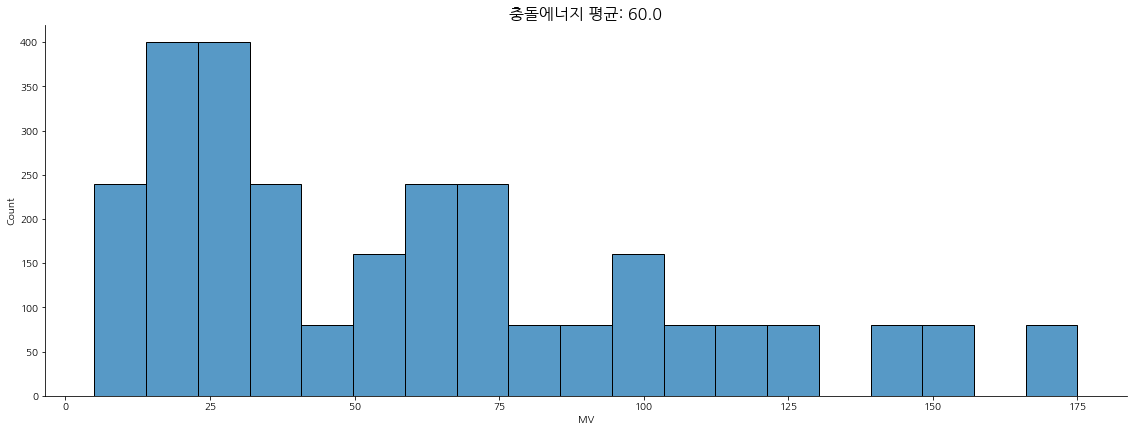

In [40]:
sns.displot(df_merge['MV'])
plt.gcf().set_size_inches(18, 6)
plt.title(f'충돌에너지 평균: {df_merge["MV"].mean()}', fontsize=16)
plt.show()

In [41]:
# 이상치 : MV > MV(mean + (2 * std) )
df_merge['abnormal'] = np.where(df_merge['MV'] > df_merge['MV'].mean() + (2 * df_merge['MV'].std()), 1, 0)
df_merge

,id,S1,S2,S3,S4,M,V,MV,abnormal
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0
...,...,...,...,...,...,...,...,...,...
2795,2795,5600.614397,5885.824925,-6380.192826,-7357.437798,50.0,1.0,50.0,0
2796,2796,-1215.328099,2702.879683,805.983784,-2876.150150,150.0,0.2,30.0,0
2797,2797,436.239993,276.327514,951.805606,-903.193922,50.0,0.2,10.0,0
2798,2798,-2394.515047,6230.349355,-8365.334186,-6421.442031,125.0,0.6,75.0,0


In [46]:
df_merge['abnormal'].value_counts()

0    2640
1     160
Name: abnormal, dtype: int64

In [48]:
# 이상치 비율 6%
df_merge['abnormal'].value_counts()[1] / df_merge['abnormal'].value_counts()[0] * 100

6.0606060606060606

In [44]:
# MV가 150 이상이면 이상치라
df_merge[df_merge['abnormal']==1]['MV'].value_counts()

175.0    80
150.0    80
Name: MV, dtype: int64

# 이상치 진단

- 각 센서들의 이상치와 정상의 비교

In [51]:
# 평균값 비교
print('abnormal :', df_merge[df_merge['abnormal']==1]['S1'].mean(), '| normal :', df_merge[df_merge['abnormal']==0]['S1'].mean())
print('abnormal :', df_merge[df_merge['abnormal']==1]['S2'].mean(), '| normal :', df_merge[df_merge['abnormal']==0]['S2'].mean())
print('abnormal :', df_merge[df_merge['abnormal']==1]['S3'].mean(), '| normal :', df_merge[df_merge['abnormal']==0]['S3'].mean())
print('abnormal :', df_merge[df_merge['abnormal']==1]['S4'].mean(), '| normal :', df_merge[df_merge['abnormal']==0]['S4'].mean())

abnormal : -910.6725618222323 | normal : -374.4574592183886
abnormal : -910.6725618222305 | normal : -374.457459317389
abnormal : -3662.427652993808 | normal : -1193.2474540432374
abnormal : -4473.323652485667 | normal : -1431.86631724777


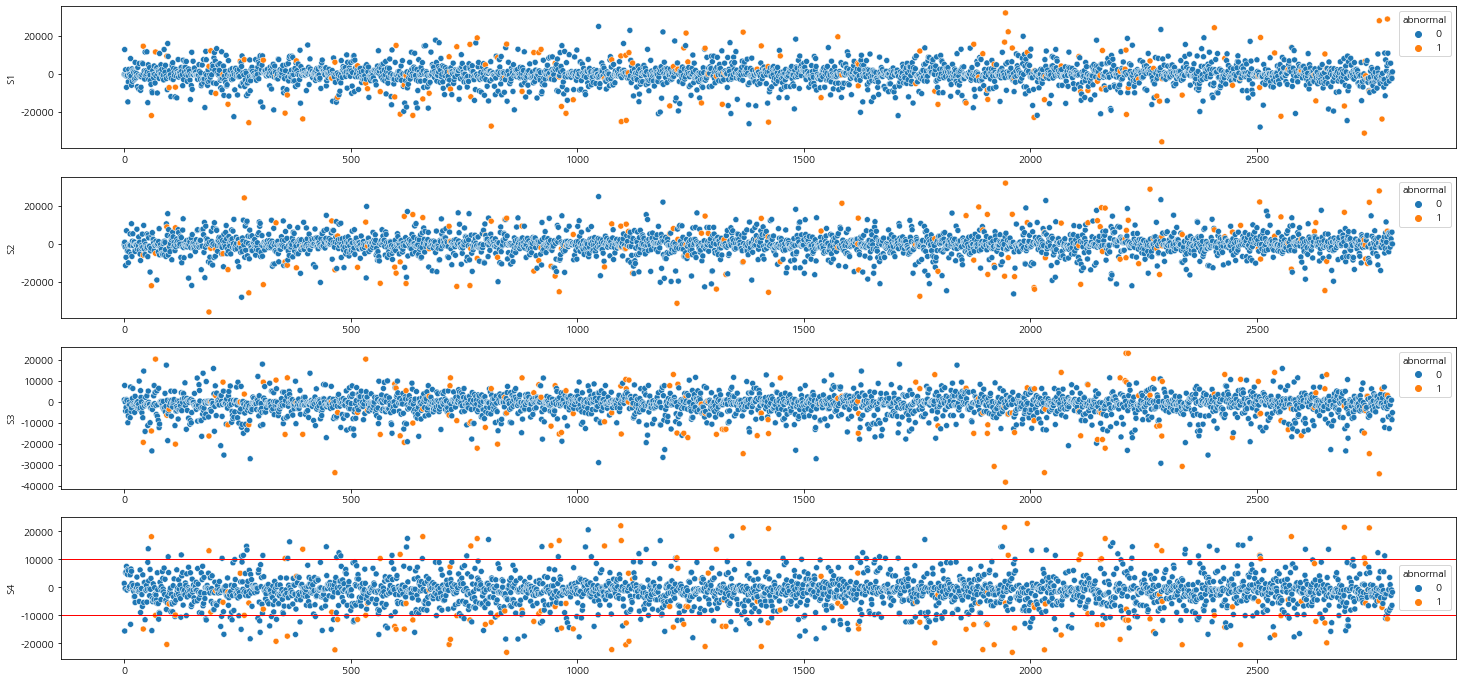

In [57]:
fig, ax = plt.subplots(4, 1)
sns.scatterplot(x=df_merge.index, y=df_merge['S1'], hue=df_merge['abnormal'], ax=ax[0])
sns.scatterplot(x=df_merge.index, y=df_merge['S2'], hue=df_merge['abnormal'], ax=ax[1])
sns.scatterplot(x=df_merge.index, y=df_merge['S3'], hue=df_merge['abnormal'], ax=ax[2])
sns.scatterplot(x=df_merge.index, y=df_merge['S4'], hue=df_merge['abnormal'], ax=ax[3])
plt.axhline(y=10000, color='r', linewidth=1)
plt.axhline(y=-10000, color='r', linewidth=1)
plt.gcf().set_size_inches(25, 12)
plt.show()

- 센서 값이 0에서 멀어질수록 이상치가 더 많이 발생
- 센서별 이상치 확인
    - +- 10000을 넘어가는 수치들 중에서 이상치 비율

In [62]:
df_s1 = df_merge[(df_merge['S1'] > 10000) | (df_merge['S1'] < -10000)]
df_s1_ab_ratio = (len(df_s1[df_s1['abnormal']==1]) / len(df_s1)) * 100
df_s1_ab_ratio

26.978417266187048

In [63]:
df_s2 = df_merge[(df_merge['S2'] > 10000) | (df_merge['S2'] < -10000)]
df_s2_ab_ratio = (len(df_s2[df_s2['abnormal']==1]) / len(df_s2)) * 100
df_s2_ab_ratio

26.978417266187048

In [64]:
df_s3 = df_merge[(df_merge['S3'] > 10000) | (df_merge['S3'] < -10000)]
df_s3_ab_ratio = (len(df_s3[df_s3['abnormal']==1]) / len(df_s3)) * 100
df_s3_ab_ratio

28.627450980392155

In [65]:
df_s4 = df_merge[(df_merge['S4'] > 10000) | (df_merge['S4'] < -10000)]
df_s4_ab_ratio = (len(df_s4[df_s4['abnormal']==1]) / len(df_s4)) * 100
df_s4_ab_ratio

31.333333333333336

In [66]:
# 비율로 보았을 대, +-10000 을 이상치라 판단하고 추가 라벨 생성
df_merge['rule_base1'] = np.where(( (df_merge['S1'] > 10000) | (df_merge['S1'] < -10000) ), 1, 0)
df_merge['rule_base2'] = np.where(( (df_merge['S2'] > 10000) | (df_merge['S2'] < -10000) ), 1, 0)
df_merge['rule_base3'] = np.where(( (df_merge['S3'] > 10000) | (df_merge['S3'] < -10000) ), 1, 0)
df_merge['rule_base4'] = np.where(( (df_merge['S4'] > 10000) | (df_merge['S4'] < -10000) ), 1, 0)

In [67]:
df_merge

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,5600.614397,5885.824925,-6380.192826,-7357.437798,50.0,1.0,50.0,0,0,0,0,0
2796,2796,-1215.328099,2702.879683,805.983784,-2876.150150,150.0,0.2,30.0,0,0,0,0,0
2797,2797,436.239993,276.327514,951.805606,-903.193922,50.0,0.2,10.0,0,0,0,0,0
2798,2798,-2394.515047,6230.349355,-8365.334186,-6421.442031,125.0,0.6,75.0,0,0,0,0,0


In [70]:
from sklearn.metrics import classification_report

print(classification_report(df_merge['abnormal'], df_merge['rule_base1']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800



In [71]:
print(classification_report(df_merge['abnormal'], df_merge['rule_base2']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      2640
           1       0.27      0.47      0.34       160

    accuracy                           0.90      2800
   macro avg       0.62      0.70      0.64      2800
weighted avg       0.93      0.90      0.91      2800



In [72]:
print(classification_report(df_merge['abnormal'], df_merge['rule_base3']))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2640
           1       0.29      0.46      0.35       160

    accuracy                           0.90      2800
   macro avg       0.63      0.69      0.65      2800
weighted avg       0.93      0.90      0.91      2800



In [73]:
print(classification_report(df_merge['abnormal'], df_merge['rule_base4']))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      2640
           1       0.31      0.59      0.41       160

    accuracy                           0.90      2800
   macro avg       0.64      0.75      0.68      2800
weighted avg       0.94      0.90      0.92      2800



# modeling

In [97]:
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

- 센서값으로 진단

In [96]:
df_merge

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,5600.614397,5885.824925,-6380.192826,-7357.437798,50.0,1.0,50.0,0,0,0,0,0
2796,2796,-1215.328099,2702.879683,805.983784,-2876.150150,150.0,0.2,30.0,0,0,0,0,0
2797,2797,436.239993,276.327514,951.805606,-903.193922,50.0,0.2,10.0,0,0,0,0,0
2798,2798,-2394.515047,6230.349355,-8365.334186,-6421.442031,125.0,0.6,75.0,0,0,0,0,0


In [94]:
X = df_merge[['S1', 'S2', 'S3', 'S4']]
Y = df_merge['abnormal']

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, stratify=Y)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((2100, 4), (2100,), (700, 4), (700,))

In [95]:
# 인스턴스
rfc = RandomForestClassifier(random_state=29)

# 학습
rfc.fit(train_X, train_Y)

# 예측
pred = rfc.predict(test_X)
print(classification_report(test_Y, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       660
           1       0.84      0.40      0.54        40

    accuracy                           0.96       700
   macro avg       0.90      0.70      0.76       700
weighted avg       0.96      0.96      0.95       700



- 하이퍼 파라미터 튜닝

In [99]:
# param_grid = ParameterGrid({
#                             'n_estimators':[400, 500],
#                             'max_depth':[3, 5, 10, 20]
# })

param_grid = {'n_estimators':[400, 500], 'max_depth':[3, 5, 10, 20]}

rfc_clf = RandomForestClassifier(random_state=29, n_jobs=-1)
grid_cv = GridSearchCV(rfc_clf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='recall')
grid_cv.fit(train_X, train_Y)

print('best param :', grid_cv.best_params_)
print('best estimator :', grid_cv.best_estimator_)
print('best score :', grid_cv.best_score_)

best param : {'max_depth': 20, 'n_estimators': 400}
best estimator : RandomForestClassifier(max_depth=20, n_estimators=400, n_jobs=-1,
                       random_state=29)
best score : 0.4666666666666666


In [100]:
# 인스턴스
rfc = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=29)
#학습
rfc.fit(train_X, train_Y)
# 예측
pred = rfc.predict(test_X)
print(classification_report(test_Y, pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       660
           1       0.89      0.40      0.55        40

    accuracy                           0.96       700
   macro avg       0.93      0.70      0.77       700
weighted avg       0.96      0.96      0.96       700



In [105]:
test_Y.value_counts(), pd.Series(pred).value_counts()

(0    660
 1     40
 Name: abnormal, dtype: int64,
 0    682
 1     18
 dtype: int64)

- 중요 변수 파악

In [106]:
rfc.feature_importances_

array([0.2108049 , 0.21290569, 0.24480862, 0.33148079])

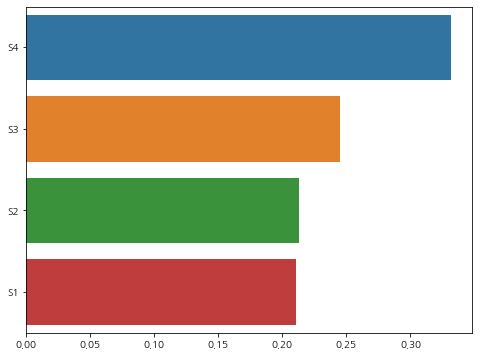

In [110]:
importance_values = rfc.feature_importances_
importance_values = pd.Series(importance_values, index=train_X.columns)
importance_values.sort_values(ascending=False, inplace=True)

sns.barplot(x=importance_values, y=importance_values.index)
plt.gcf().set_size_inches(8, 6)
plt.show()

- 변수 추가

In [111]:
df_new = df_merge.copy()

df_new['S1_2'] = df_new['S1'] * df_new['S1']
df_new['S2_2'] = df_new['S2'] * df_new['S2']
df_new['S3_2'] = df_new['S3'] * df_new['S3']
df_new['S4_2'] = df_new['S4'] * df_new['S4']

df_new

,id,S1,S2,S3,S4,M,V,MV,abnormal,rule_base1,rule_base2,rule_base3,rule_base4,S1_2,S2_2,S3_2,S4_2
0,0,-308.304553,-308.304553,1119.504719,1410.502893,50.0,0.4,20.0,0,0,0,0,0,9.505170e+04,9.505170e+04,1.253291e+06,1.989518e+06
1,1,12780.176893,981.778780,7953.031214,-15584.755221,100.0,1.0,100.0,0,1,0,0,1,1.633329e+08,9.638896e+05,6.325071e+07,2.428846e+08
2,2,-674.289628,-1575.681938,137.430228,-407.092340,25.0,0.4,10.0,0,0,0,0,0,4.546665e+05,2.482774e+06,1.888707e+04,1.657242e+05
3,3,2164.216981,-11274.728589,-4221.738240,5241.350867,150.0,0.4,60.0,0,0,1,0,0,4.683835e+06,1.271195e+08,1.782307e+07,2.747176e+07
4,4,-980.480585,-6966.912566,-2555.746810,5596.931287,150.0,0.4,60.0,0,0,0,0,0,9.613422e+05,4.853787e+07,6.531842e+06,3.132564e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,2795,5600.614397,5885.824925,-6380.192826,-7357.437798,50.0,1.0,50.0,0,0,0,0,0,3.136688e+07,3.464294e+07,4.070686e+07,5.413189e+07
2796,2796,-1215.328099,2702.879683,805.983784,-2876.150150,150.0,0.2,30.0,0,0,0,0,0,1.477022e+06,7.305559e+06,6.496099e+05,8.272240e+06
2797,2797,436.239993,276.327514,951.805606,-903.193922,50.0,0.2,10.0,0,0,0,0,0,1.903053e+05,7.635689e+04,9.059339e+05,8.157593e+05
2798,2798,-2394.515047,6230.349355,-8365.334186,-6421.442031,125.0,0.6,75.0,0,0,0,0,0,5.733702e+06,3.881725e+07,6.997882e+07,4.123492e+07


In [112]:
X = df_new[['S1', 'S2', 'S3', 'S4', 'S1_2', 'S2_2', 'S3_2', 'S4_2']]
Y = df_new['abnormal']

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, stratify=Y)

train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((2100, 8), (2100,), (700, 8), (700,))

In [113]:
rfc = RandomForestClassifier(n_estimators=400, max_depth=20, random_state=29)
rfc.fit(train_X, train_Y)

pred = rfc.predict(test_X)

print(classification_report(test_Y, pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       660
           1       0.90      0.47      0.62        40

    accuracy                           0.97       700
   macro avg       0.94      0.74      0.80       700
weighted avg       0.97      0.97      0.96       700



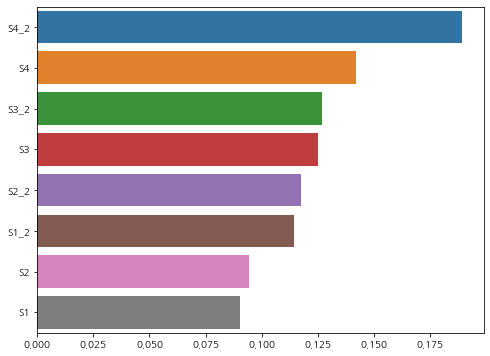

In [114]:
importance_values = rfc.feature_importances_
importance_values = pd.Series(importance_values, index=train_X.columns)
importance_values.sort_values(ascending=False, inplace=True)

sns.barplot(x=importance_values, y=importance_values.index)
plt.gcf().set_size_inches(8, 6)
plt.show()

- 모델 저장

In [ ]:
import pickle

#모델 저장
save_model = pickle.dumps(rfc)
#모델 불러오기
clf_from_pickle = pickle.load(save_model)